In [315]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [316]:
video_path = "124038_Lobster_1.mp4"

In [317]:
cap = cv2.VideoCapture(video_path)  # Opens the video file for reading


In [318]:
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # Gets the total number of frames in the video
fps = cap.get(cv2.CAP_PROP_FPS)  # Gets the frames per second (fps) of the video

if fps <= 0:
    fps = 30  # Fallback to a default fps value if it cannot be read correctly
print(f"Total Frames in Video: {total_frames}, FPS: {fps}")


Total Frames in Video: 44301, FPS: 29.994810897714697


In [362]:
def sec_frame_id(sec,fps=fps):
    return sec * fps

In [319]:
total_frames

44301

In [320]:
R_sum_list = []
G_sum_list = []
B_sum_list = []
while cap.isOpened():
    ret, frame = cap.read() # Read the next frame from the video
    if not ret:
        break  # Exit loop if no frame is read (end of video)   
        print("no frame")
    
    R_sum_list.append(frame[:,:,0].sum().sum())    
    G_sum_list.append(frame[:,:,1].sum().sum())    
    B_sum_list.append(frame[:,:,2].sum().sum()) 
    
cap.release()  # Release the video capture object to free resources
        


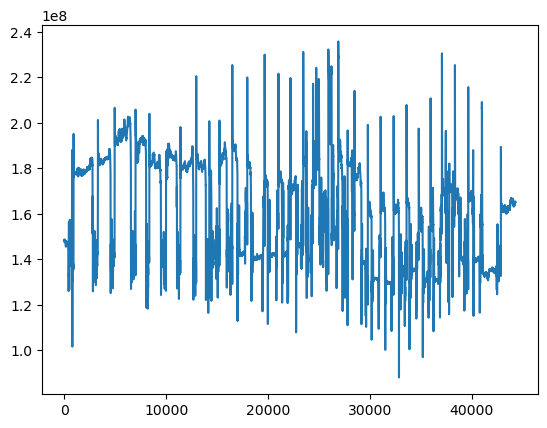

In [321]:
plt.plot(G_sum_list)

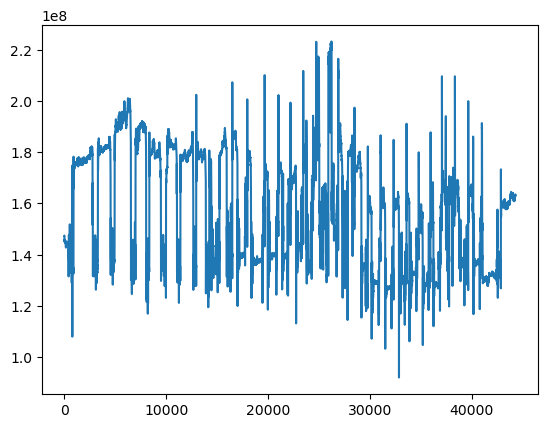

In [334]:
plt.plot(B_sum_list)

In [65]:
#frame.shape

In [66]:
# Convert the image from BGR (OpenCV default) to RGB for matplotlib
#frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Use matplotlib to display the image
#plt.imshow(frame_rgb)
#plt.axis('off')  # Hide the axes
#plt.show()

In [335]:
boundary = 166317403.5
#max(R_sum_list)-min(R_sum_list)/2
boundary 

166317403.5

## 10 minuts vide0

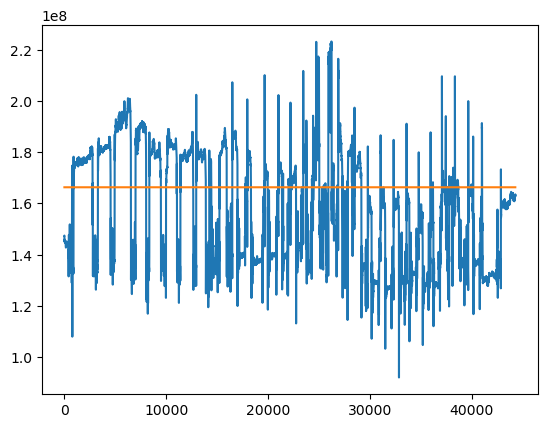

In [336]:
plt.plot(B_sum_list)
plt.plot(np.arange(len(B_sum_list)),len(B_sum_list)*[boundary])
plt.savefig("boundarylineboundaryset.png")

In [337]:
blank_frames = []
lobster_events =[]
for i,v in enumerate(R_sum_list):
    if v < boundary:
        lobster_events.append((i,v))
    else: 
        blank_frames.append((i,v))
    
    
    

In [359]:
GAP =63


In [360]:
# Initialize variables
sublists = []
current_sublist = [lobster_events[0]]  # Start with the first tuple in the first sublist
# Iterate over the list, starting from the second element
for i in range(1, len(lobster_events)):
    # Check if the difference between the current and previous first elements is greater than GAP
    if lobster_events[i][0] - lobster_events[i - 1][0] > GAP:
        # If there's a gap, save the current sublist and start a new one
        sublists.append(current_sublist)
        current_sublist = []
    
    # Add the current tuple to the current sublist
    current_sublist.append(lobster_events[i])

# Append the last sublist to sublists
sublists.append(current_sublist)

In [361]:
len(sublists)

31

In [105]:
sublists

[[(0, 146581742),
  (1, 146590315),
  (2, 146566135),
  (3, 146378310),
  (4, 146388904),
  (5, 146114425),
  (6, 146045033),
  (7, 144962480),
  (8, 145283334),
  (9, 145387000),
  (10, 145137773),
  (11, 145089091),
  (12, 145115590),
  (13, 145097630),
  (14, 145097630),
  (15, 145103517),
  (16, 145131117),
  (17, 145190715),
  (18, 145294863),
  (19, 145292493),
  (20, 145396769),
  (21, 145476301),
  (22, 145555364),
  (23, 145517998),
  (24, 145409531),
  (25, 145130871),
  (26, 144926247),
  (27, 144937630),
  (28, 144802959),
  (29, 144802959),
  (30, 144767804),
  (31, 144728725),
  (32, 144692510),
  (33, 144714009),
  (34, 144724986),
  (35, 144634625),
  (36, 144728867),
  (37, 144684018),
  (38, 144668758),
  (39, 144725076),
  (40, 144727619),
  (41, 144643982),
  (42, 144625698),
  (43, 144589692),
  (44, 144589177),
  (45, 144592681),
  (46, 144607069),
  (47, 144616759),
  (48, 144608762),
  (49, 144647354),
  (50, 144559532),
  (51, 144559532),
  (52, 144544545),
  (

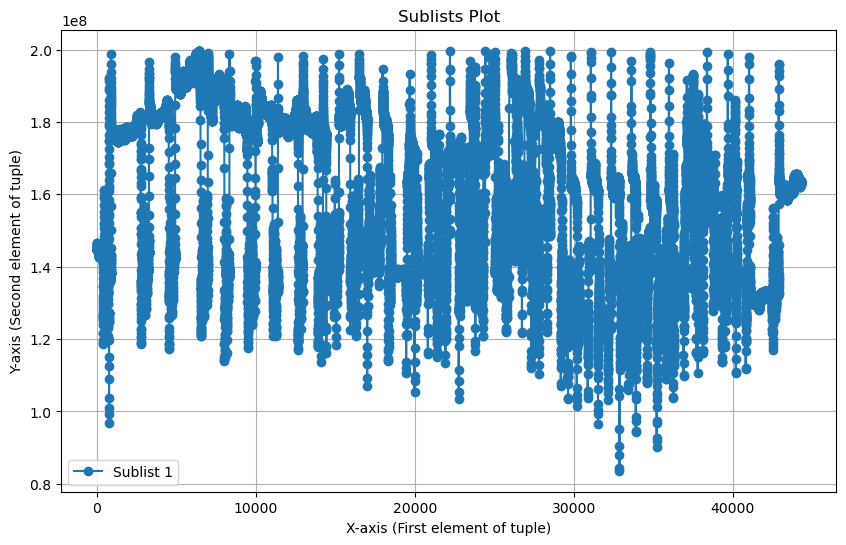

In [85]:
plt.figure(figsize=(10, 6))  # Set up the plot size

# Iterate through each sublist and plot it
for idx, sublist in enumerate(sublists):
    # Extract x and y values from each tuple
    x_values = [item[0] for item in sublist]  # First element in each tuple is the x-value
    y_values = [item[1] for item in sublist]  # Second element in each tuple is the y-value
    
    # Plot each sublist with different color and label
    plt.plot(x_values, y_values, marker='o', label=f'Sublist {idx + 1}')

# Add titles and labels
plt.title('Sublists Plot')
plt.xlabel('X-axis (First element of tuple)')
plt.ylabel('Y-axis (Second element of tuple)')
plt.legend()  # Show the legend
plt.grid(True)  # Add a grid to the plot

# Display the plot
plt.show()

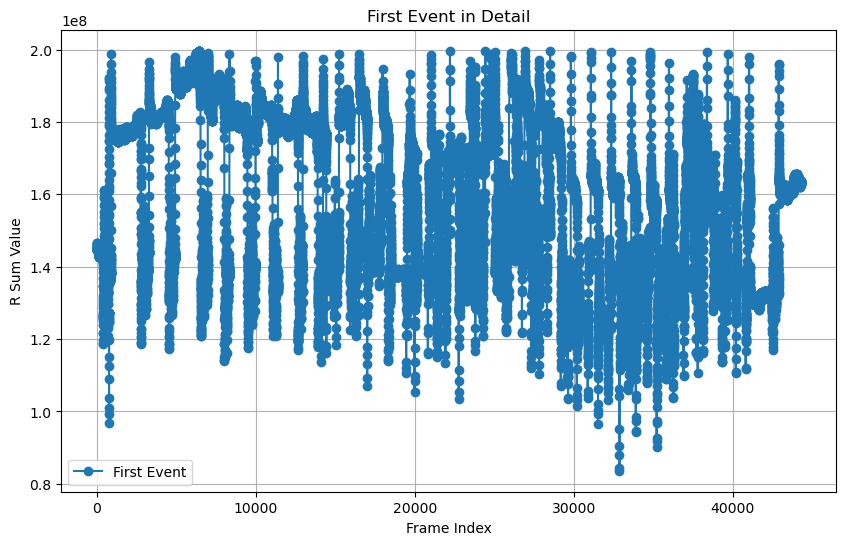

In [78]:
first_event = sublists[0]
x_values = [item[0] for item in first_event]
y_values = [item[1] for item in first_event]

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', label='First Event')
plt.title('First Event in Detail')
plt.xlabel('Frame Index')
plt.ylabel('R Sum Value')
plt.legend()
plt.grid(True)

plt.show()

In [86]:
second_event = sublists[1]
x_values = [item[0] for item in second_event]
y_values = [item[1] for item in second_event]

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', label='Second Event')
plt.title('Second Event in Detail')
plt.xlabel('Frame Index')
plt.ylabel('R Sum Value')
plt.legend()
plt.grid(True)

plt.show()

IndexError: list index out of range

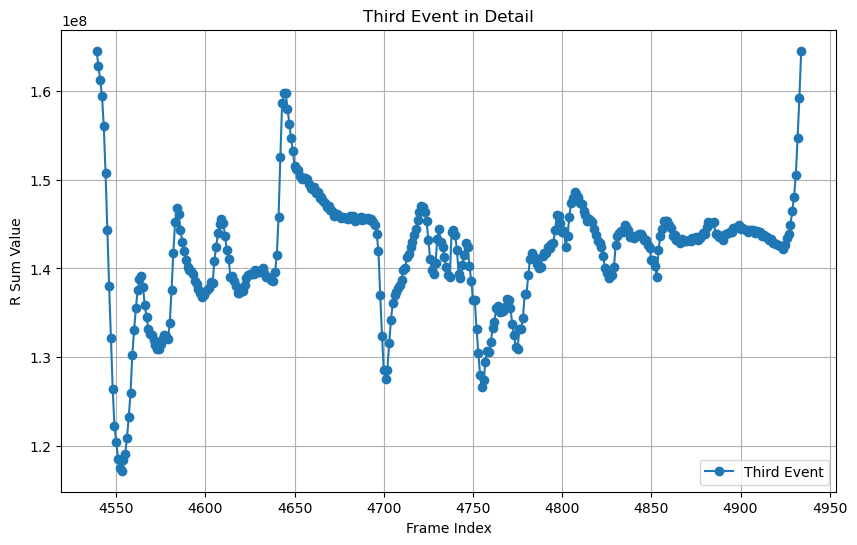

In [28]:
third_event = sublists[2]
x_values = [item[0] for item in third_event]
y_values = [item[1] for item in third_event]

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', label='Third Event')
plt.title('Third Event in Detail')
plt.xlabel('Frame Index')
plt.ylabel('R Sum Value')
plt.legend()
plt.grid(True)

plt.show()

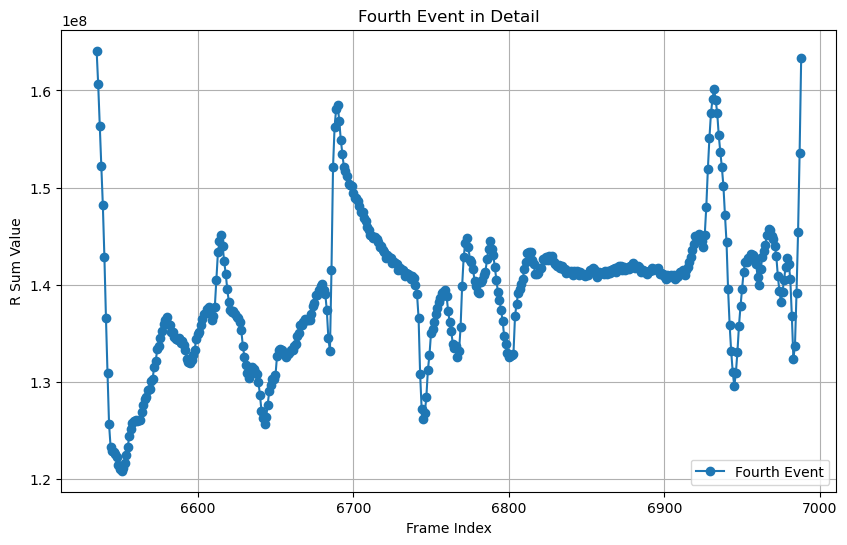

In [24]:
fourth_event = sublists[3]
x_values = [item[0] for item in fourth_event]
y_values = [item[1] for item in fourth_event]

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', label='Fourth Event')
plt.title('Fourth Event in Detail')
plt.xlabel('Frame Index')
plt.ylabel('R Sum Value')
plt.legend()
plt.grid(True)

plt.show()

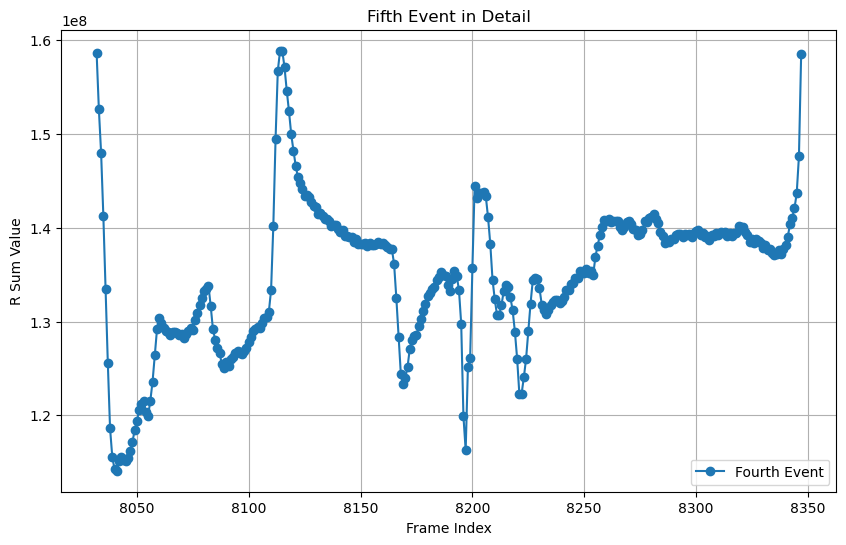

In [26]:
fifth_event = sublists[4]
x_values = [item[0] for item in fifth_event]
y_values = [item[1] for item in fifth_event]

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', label='Fourth Event')
plt.title('Fifth Event in Detail')
plt.xlabel('Frame Index')
plt.ylabel('R Sum Value')
plt.legend()
plt.grid(True)

plt.show()

In [67]:
lobster_data = []
for lobster_idx, lobster_event in enumerate(sublists, start=0):
    for frame_index, r_sum_value in lobster_event:
        lobster_data.append((frame_index, lobster_idx))

df = pd.DataFrame(lobster_data, columns=['Frame Index', 'Lobster'])

In [68]:
print(df.head())

   Frame Index  Lobster
0            0        0
1            1        0
2            2        0
3            3        0
4            4        0


In [69]:
print(df.tail(10))

       Frame Index  Lobster
43621        44291        0
43622        44292        0
43623        44293        0
43624        44294        0
43625        44295        0
43626        44296        0
43627        44297        0
43628        44298        0
43629        44299        0
43630        44300        0


In [71]:
df.to_excel('lobster_events.xlsx', index=False)

In [370]:
filliping_time = 2.38 *60
int(sec_frame_id(filliping_time)  )


4283

In [369]:
fps

29.994810897714697